In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import ma

from metpy.io.nexrad import Level3File

In [2]:
# Open the file
name = '../testdata/Level3_FFC_N0Q_20140407_1805.nids'
f = Level3File(name)

In [3]:
# Pull the data out of the file object
datadict = f.sym_block[0][0]

# Turn into an array, then mask
ref = ma.array(datadict['data'])
ref[ref==32770] = ma.masked

In [4]:
# Grab azimuths and calculate a range based on number of gates
az = np.array(datadict['start_az'] + [datadict['end_az'][-1]])
rng = np.arange(ref.shape[1] + 1)

# Convert az,range to x,y
xlocs = rng * np.sin(np.deg2rad(az[:, np.newaxis]))
ylocs = rng * np.cos(np.deg2rad(az[:, np.newaxis]))

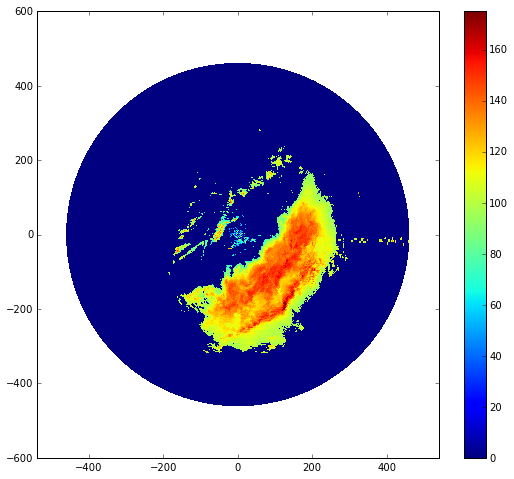

In [5]:
# Plot -- ref units are raw 8-bit values, not floats
fig = plt.figure(figsize=(9, 8))
plt.pcolormesh(xlocs, ylocs, ref)
plt.colorbar()
plt.axis('equal')
plt.show()